<a href="https://colab.research.google.com/github/HEMANATH-K/Machine-learning/blob/main/Spam_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
!pip install ydata-profiling
from ydata_profiling import ProfileReport

In [ ]:
s_data=pd.read_csv("/content/news.csv")
s_data.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [ ]:
s_data.tail()

,Unnamed: 0,title,text,label
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL
6334,4330,Jeb Bush Is Suddenly Attacking Trump. Here's W...,Jeb Bush Is Suddenly Attacking Trump. Here's W...,REAL


In [ ]:
profile=ProfileReport(s_data)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
s_data .isnull().sum()

,0
Unnamed: 0,0
title,0
text,0
label,0


In [ ]:
l=LabelEncoder()
s1=l.fit_transform(s_data['label'])
s2=l.fit_transform(s_data['text'])
s3=l.fit_transform(s_data['title'])

s_data['label']=s1
s_data['text']=s2
s_data['title']=s3
s_data['Unnamed: 0	']=s4
print(s1,s2,s3
      )

KeyError: 'Unnamed'

In [ ]:
n=[]

n.append(s_data['title'])
n.append(s_data['text'])
n.append(s_data['label'])

print(n)

[0       6155
1       5747
2       2946
3        653
4       4788
        ... 
6330    4570
6331    5121
6332     413
6333    2586
6334    2823
Name: title, Length: 6335, dtype: int64, 0       1514
1       2185
2       5165
3       5991
4       2733
        ... 
6330    4591
6331    4861
6332     217
6333     723
6334    2771
Name: text, Length: 6335, dtype: int64, 0       0
1       0
2       1
3       0
4       1
       ..
6330    1
6331    0
6332    0
6333    1
6334    1
Name: label, Length: 6335, dtype: int64]


In [ ]:
x=s_data.drop(columns='label',axis=1)
y=s_data['label']
print(x)
print(y)

      Unnamed: 0  title  text
0           8476   6155  1514
1          10294   5747  2185
2           3608   2946  5165
3          10142    653  5991
4            875   4788  2733
...          ...    ...   ...
6330        4490   4570  4591
6331        8062   5121  4861
6332        8622    413   217
6333        4021   2586   723
6334        4330   2823  2771

[6335 rows x 3 columns]
0       0
1       0
2       1
3       0
4       1
       ..
6330    1
6331    0
6332    0
6333    1
6334    1
Name: label, Length: 6335, dtype: int64


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=2)
print(x.shape,x_train.shape,x_test.shape,y_train.shape,y_test.shape)
x=StandardScaler()
x_train=x.fit_transform(x_train)
x_test=x.fit_transform(x_test)

(6335, 3) (5068, 3) (1267, 3) (5068,) (1267,)


In [ ]:
model=LogisticRegression()
model.fit(x_train,y_train)
y_pred =model.predict(x_test)

In [ ]:
s=accuracy_score(y_pred,y_test)
print(s)

0.9992107340173638


In [ ]:
x_pred=model.predict(x_train)
s1=accuracy_score(x_pred,y_train)
print(s1)

0.9986187845303868


In [ ]:
cv_scores = cross_val_score(model, x_train, y_train, cv=10)
print(f"Cross-validation scores: {cv_scores}")
print(f"Average CV score: {cv_scores.mean()}")

Cross-validation scores: [0.99802761 1.         0.99802761 0.99802761 0.99802761 0.99802761
 1.         0.99802761 1.         1.        ]
Average CV score: 0.9988165680473372


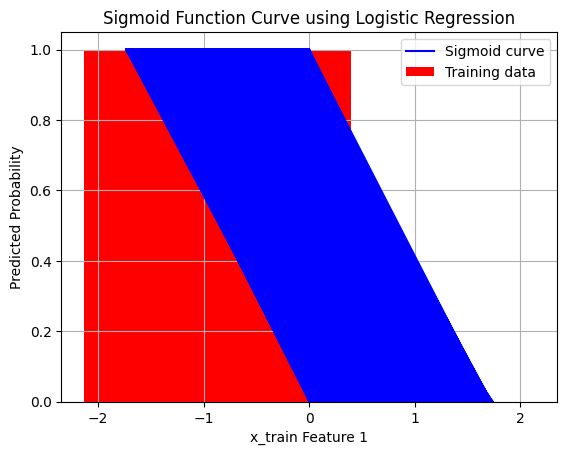

In [ ]:
# Assuming x_train has shape (5068, 3) and you want to plot against the first feature
plt.bar(x_train[:, 0], y_train, color='red', label='Training data')
plt.plot(x_train[:, 0], y_train, color='blue', label='Sigmoid curve')
plt.xlabel('x_train Feature 1') # Changed label to be more descriptive
plt.ylabel('Predicted Probability')
plt.title('Sigmoid Function Curve using Logistic Regression')
plt.legend()
plt.grid()
plt.show()
